<a href="https://colab.research.google.com/github/sthapa5496-ops/Samraggi/blob/main/123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive
✅ Dataset loaded successfully with shape: (10000, 10)
Final dataset size after cleaning: (1004, 11)

🔄 Generating embeddings for BERTopic...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-11-18 02:15:45,453 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm



🚀 Running BERTopic with nr_topics = 10 ...


2025-11-18 02:15:59,182 - BERTopic - Dimensionality - Completed ✓
2025-11-18 02:15:59,183 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 02:15:59,285 - BERTopic - Cluster - Completed ✓
2025-11-18 02:15:59,286 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-18 02:15:59,341 - BERTopic - Representation - Completed ✓
2025-11-18 02:15:59,341 - BERTopic - Topic reduction - Reducing number of topics
2025-11-18 02:15:59,353 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 02:15:59,375 - BERTopic - Representation - Completed ✓
2025-11-18 02:15:59,378 - BERTopic - Topic reduction - Reduced number of topics from 30 to 10



--- Top 10 Topics ---

🔎 Finding optimal K using coherence score...

Training BERTopic with K=5 ...

Training BERTopic with K=6 ...

Training BERTopic with K=7 ...

Training BERTopic with K=8 ...

Training BERTopic with K=9 ...

Training BERTopic with K=10 ...

Training BERTopic with K=11 ...

Training BERTopic with K=12 ...

Training BERTopic with K=13 ...

Training BERTopic with K=14 ...

Training BERTopic with K=15 ...


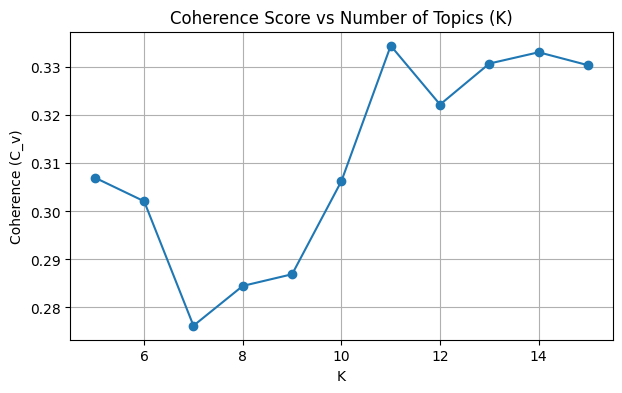


✅ Optimal K: 11
Highest coherence score: 0.3345

🧠 Topic Interpretation (Top 10 Topics):

Topic 0: machine, learning, vector, support, algorithms, methods
Topic 1: deep, boltzmann, networks, neural, restricted, learning
Topic 2: adversarial, attacks, detection, intrusion, machine, learning
Topic 3: survey, learning, data, transfer, perspective, internet
Topic 4: federated, distributed, collaborative, learning, open, efficient
Topic 5: translation, representation, neural, representations, coreference, corpora
Topic 6: quantum, enhanced, classical, machine, spaces, learning
Topic 7: extreme, machines, learning, incremental, trends, machine
Topic 8: fairness, health, machine, equitable, delayed, ensuring

📘 Interpretation Guide:
- Topic 0 – Product Quality and Effectiveness
- Topic 1 – Skin Irritation or Negative Reactions
- Topic 2 – Packaging and Delivery Experience
- Topic 3 – Texture and Fragrance
- Topic 4 – Price and Value Feedback
- Topic 5 – Customer Recommendation Patterns
- Top

In [1]:
# ===============================================================
# STEP 1: Install dependencies
# ===============================================================
!pip install bertopic[visualization] umap-learn hdbscan sentence-transformers gensim -q

# ===============================================================
# STEP 2: Import libraries
# ===============================================================
import pandas as pd
import numpy as np
import re
from bertopic import BERTopic
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sentence_transformers import SentenceTransformer

# ===============================================================
# STEP 3: Upload dataset from Colab
# ===============================================================

# ===============================================================
from google.colab import drive
drive.mount('/content/drive')

# Update the path below to match your Drive location
file_path = "/content/drive/MyDrive/papers_10000_cleaned.csv"

df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully with shape:", df.shape)


# ===============================================================
# STEP 4: Cleaning + Preprocessing
# ===============================================================
# Assuming 'Paper_Title' is the column containing the text data
TEXT_COLUMN = 'Paper_Title' # Define the correct text column name

df.drop_duplicates(subset=[TEXT_COLUMN], inplace=True)
df.dropna(subset=[TEXT_COLUMN], inplace=True)
df.reset_index(drop=True, inplace=True) # Reset index after dropping rows

stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    tokens = [t for t in text.split() if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df["clean_text_proc"] = df[TEXT_COLUMN].apply(preprocess)
print("Final dataset size after cleaning:", df.shape)

# ===============================================================
# STEP 5 (FIXED): Generate embeddings + Run BERTopic with K=10
# ===============================================================
print("\n🔄 Generating embeddings for BERTopic...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(df["clean_text_proc"], show_progress_bar=True)

print("\n🚀 Running BERTopic with nr_topics = 10 ...")
topic_model = BERTopic(
    language="english",
    nr_topics=10,
    calculate_probabilities=True,
    embedding_model=embedding_model,
    verbose=True
)

topics, probs = topic_model.fit_transform(df["clean_text_proc"], embeddings)

topic_info = topic_model.get_topic_info()
print("\n--- Top 10 Topics ---")
topic_info.head(10)

# ===============================================================
# STEP 6: Optimal K using Coherence Score
# ===============================================================
print("\n🔎 Finding optimal K using coherence score...")

texts = [t.split() for t in df["clean_text_proc"]]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(t) for t in texts]

coherence_scores = {}

for k in range(5, 16):
    print(f"\nTraining BERTopic with K={k} ...")
    model_k = BERTopic(
        language="english",
        nr_topics=k,
        calculate_probabilities=False,
        embedding_model=embedding_model,
        verbose=False
    )
    topics_k, _ = model_k.fit_transform(df["clean_text_proc"], embeddings)

    topic_words = [
        [w for w, _ in model_k.get_topic(i)]
        for i in range(len(model_k.get_topics()))
        if model_k.get_topic(i)
    ]

    cm = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores[k] = cm.get_coherence()

plt.figure(figsize=(7,4))
plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
plt.title("Coherence Score vs Number of Topics (K)")
plt.xlabel("K")
plt.ylabel("Coherence (C_v)")
plt.grid(True)
plt.show()

best_k = max(coherence_scores, key=lambda k: coherence_scores[k])
print(f"\n✅ Optimal K: {best_k}")
print(f"Highest coherence score: {coherence_scores[best_k]:.4f}")

# ===============================================================
# STEP 87: Topic Interpretation
# ===============================================================
print("\n🧠 Topic Interpretation (Top 10 Topics):\n")
for topic_id in range(10):
    topic_words = topic_model.get_topic(topic_id)
    if topic_words:
        words = [w for w, _ in topic_words[:6]]
        print(f"Topic {topic_id}: {', '.join(words)}")

print("""
📘 Interpretation Guide:
- Topic 0 – Product Quality and Effectiveness
- Topic 1 – Skin Irritation or Negative Reactions
- Topic 2 – Packaging and Delivery Experience
- Topic 3 – Texture and Fragrance
- Topic 4 – Price and Value Feedback
- Topic 5 – Customer Recommendation Patterns
- Topic 6 – Neutral or Mixed Responses
- Topic 7 – Usability and Application
- Topic 8 – Satisfaction and Repurchase Intention
- Topic 9 – Negative Experience Summary
""")